<!-- # Copyright (c) 2025 takotime808 -->

### Model Comparison Plots


Bad key text.markup in file /Users/tako/.matplotlib/matplotlibrc, line 165 ("text.markup         : 'plain'  # Affects how text, such as titles and labels, are")
You probably need to get an updated matplotlibrc file from
https://github.com/matplotlib/matplotlib/blob/v3.6.3/matplotlibrc.template
or from the matplotlib source distribution


Saved: surrogate_model_summary.png


'surrogate_model_summary.png'

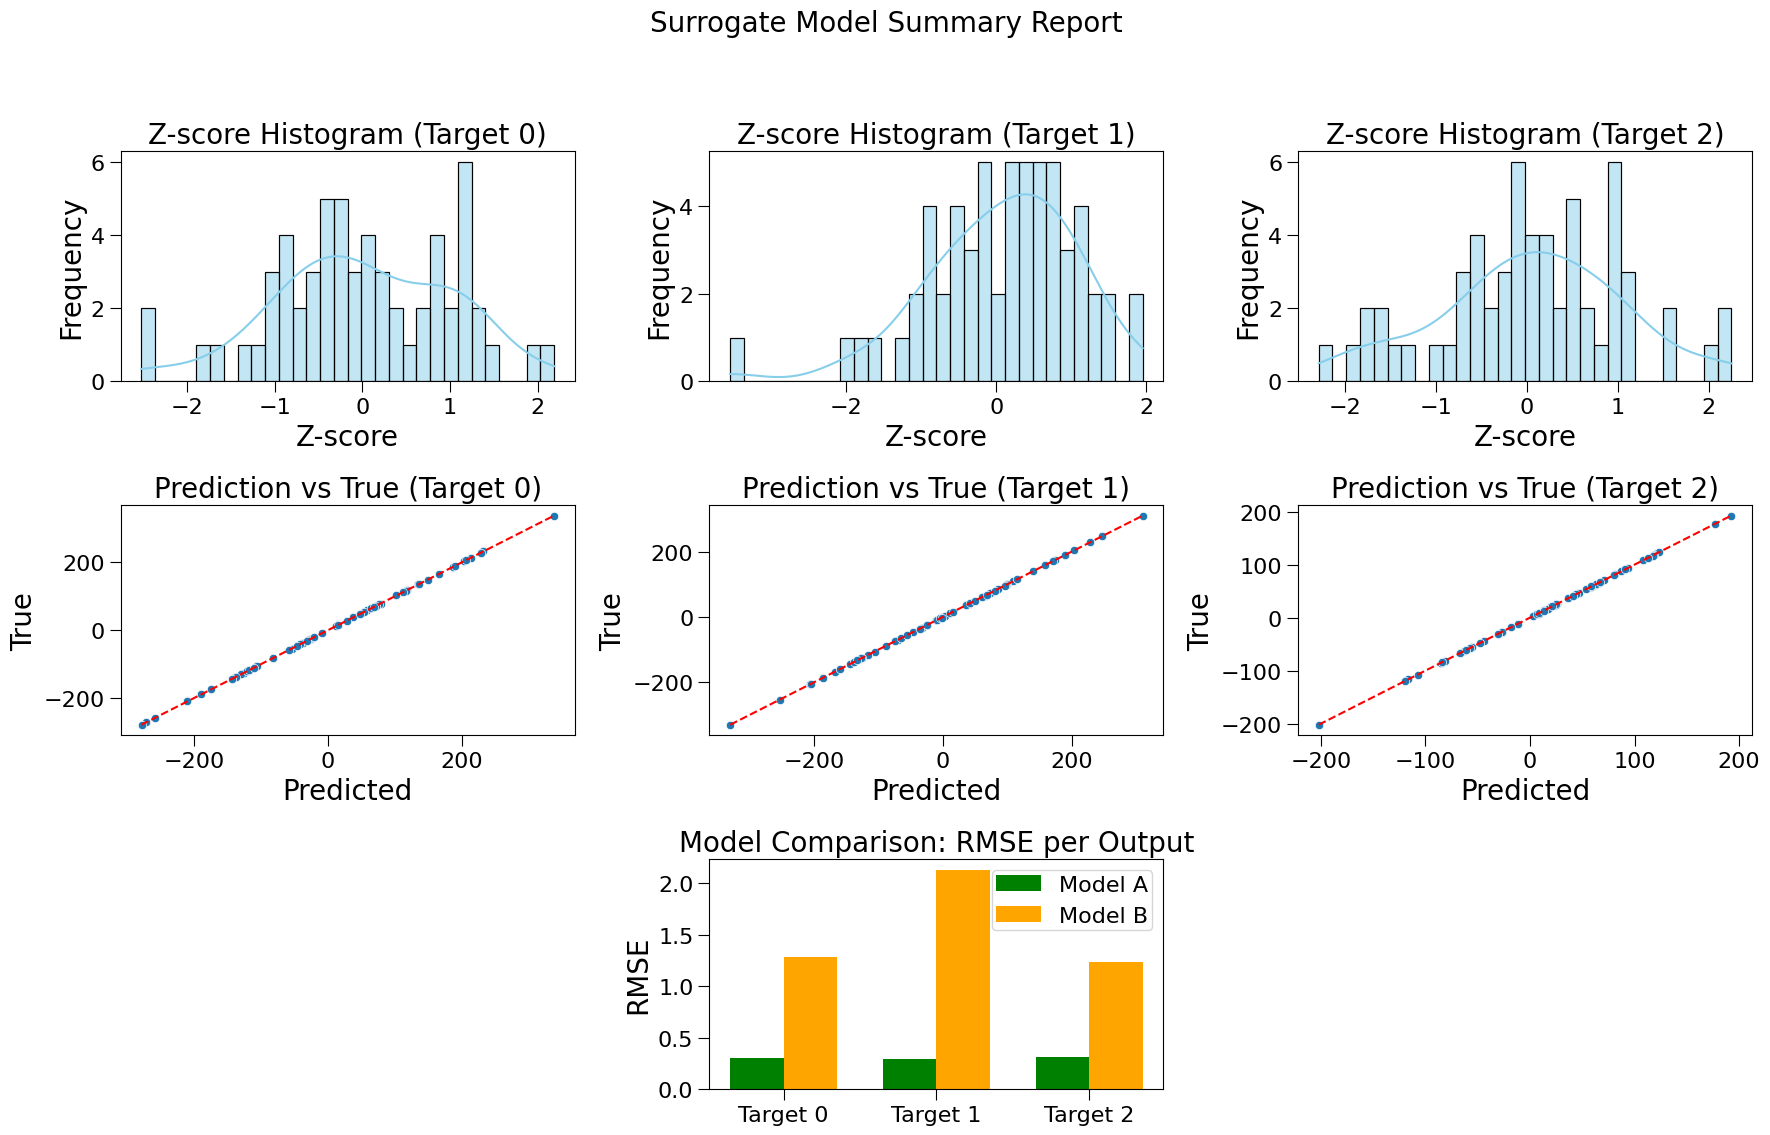

In [1]:
from multioutreg.figures.model_comparison import plot_surrogate_model_summary

from sklearn.datasets import make_regression
from sklearn.model_selection import train_test_split

X, Y = make_regression(n_samples=300, n_features=5, n_targets=3, noise=0.3, random_state=0)
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=0)

plot_surrogate_model_summary(X_train, X_test, Y_train, Y_test)


In [2]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import mean_squared_error
from sklearn.multioutput import MultiOutputRegressor
from sklearn.linear_model import LinearRegression

def plot_surrogate_model_summary(X_train, X_test, Y_train, Y_test, model=None, compare=True, rmse_plot_index=1, save_path="surrogate_model_summary.png"):
    """
    Generate a summary diagnostic grid for multi-output surrogate modeling.

    Parameters:
        X_train, X_test, Y_train, Y_test : np.ndarray
            Training and testing data.
        model : sklearn estimator, optional
            A fitted multi-output model. If None, LinearRegression is used.
        compare : bool
            If True, compares with a second noisy model.
        save_path : str
            Path to save the final figure as PNG.
    """
    n_targets = Y_train.shape[1]
    
    if model is None:
        model = MultiOutputRegressor(LinearRegression())
        model.fit(X_train, Y_train)

    Y_pred = model.predict(X_test)
    residuals = Y_test - Y_pred
    Y_std = np.std(residuals, axis=0, keepdims=True) * np.ones_like(Y_pred)

    # Optional comparison with noisy model
    if compare:
        noise_model = MultiOutputRegressor(LinearRegression())
        Y_train_noisy = Y_train + np.random.normal(0, 10, size=Y_train.shape)
        noise_model.fit(X_train, Y_train_noisy)
        Y_pred_noise = noise_model.predict(X_test)
        rmse_noise = np.sqrt(mean_squared_error(Y_test, Y_pred_noise, multioutput='raw_values'))
    else:
        rmse_noise = None

    rmse_clean = np.sqrt(mean_squared_error(Y_test, Y_pred, multioutput='raw_values'))

    # === Grid layout ===
    n_cols = min(n_targets, 3)
    n_rows = 3

    fig, axes = plt.subplots(n_rows, n_cols, figsize=(6 * n_cols, 12))
    if n_cols == 1:
        axes = np.array([[axes[0]], [axes[1]], [axes[2]]])  # force 2D indexing

    fig.suptitle("Surrogate Model Summary Report", fontsize=20)

    # --- Row 1: Z-score Histograms
    for i in range(n_cols):
        if i >= n_targets:
            axes[0, i].axis('off')
            continue
        z_scores = (Y_test[:, i] - Y_pred[:, i]) / Y_std[:, i]
        sns.histplot(z_scores, bins=30, kde=True, ax=axes[0, i], color="skyblue")
        axes[0, i].set_title(f"Z-score Histogram (Target {i})")
        axes[0, i].set_xlabel("Z-score")
        axes[0, i].set_ylabel("Frequency")

    # --- Row 2: Prediction vs True
    for i in range(n_cols):
        if i >= n_targets:
            axes[1, i].axis('off')
            continue
        sns.scatterplot(x=Y_pred[:, i], y=Y_test[:, i], ax=axes[1, i])
        axes[1, i].plot([Y_test[:, i].min(), Y_test[:, i].max()],
                        [Y_test[:, i].min(), Y_test[:, i].max()], 'r--')
        axes[1, i].set_title(f"Prediction vs True (Target {i})")
        axes[1, i].set_xlabel("Predicted")
        axes[1, i].set_ylabel("True")

    # --- Row 3: RMSE Comparison Bar Chart
    ax_rmse = axes[2, rmse_plot_index]
    width = 0.35
    indices = np.arange(n_targets)
    ax_rmse.bar(indices - width/2, rmse_clean, width, label='Model A', color='green')
    if rmse_noise is not None:
        ax_rmse.bar(indices + width/2, rmse_noise, width, label='Model B', color='orange')

    ax_rmse.set_xticks(indices)
    ax_rmse.set_xticklabels([f"Target {i}" for i in range(n_targets)])
    ax_rmse.set_ylabel("RMSE")
    ax_rmse.set_title("Model Comparison: RMSE per Output")
    ax_rmse.legend()

    # Turn off unused subplots
    for j in range(n_cols):
        if j != rmse_plot_index:
            axes[2, j].axis('off')

    fig.tight_layout(rect=[0, 0.03, 1, 0.95])
    fig.savefig(save_path, dpi=300)
    print(f"Saved: {save_path}")


Saved: surrogate_model_summary.png


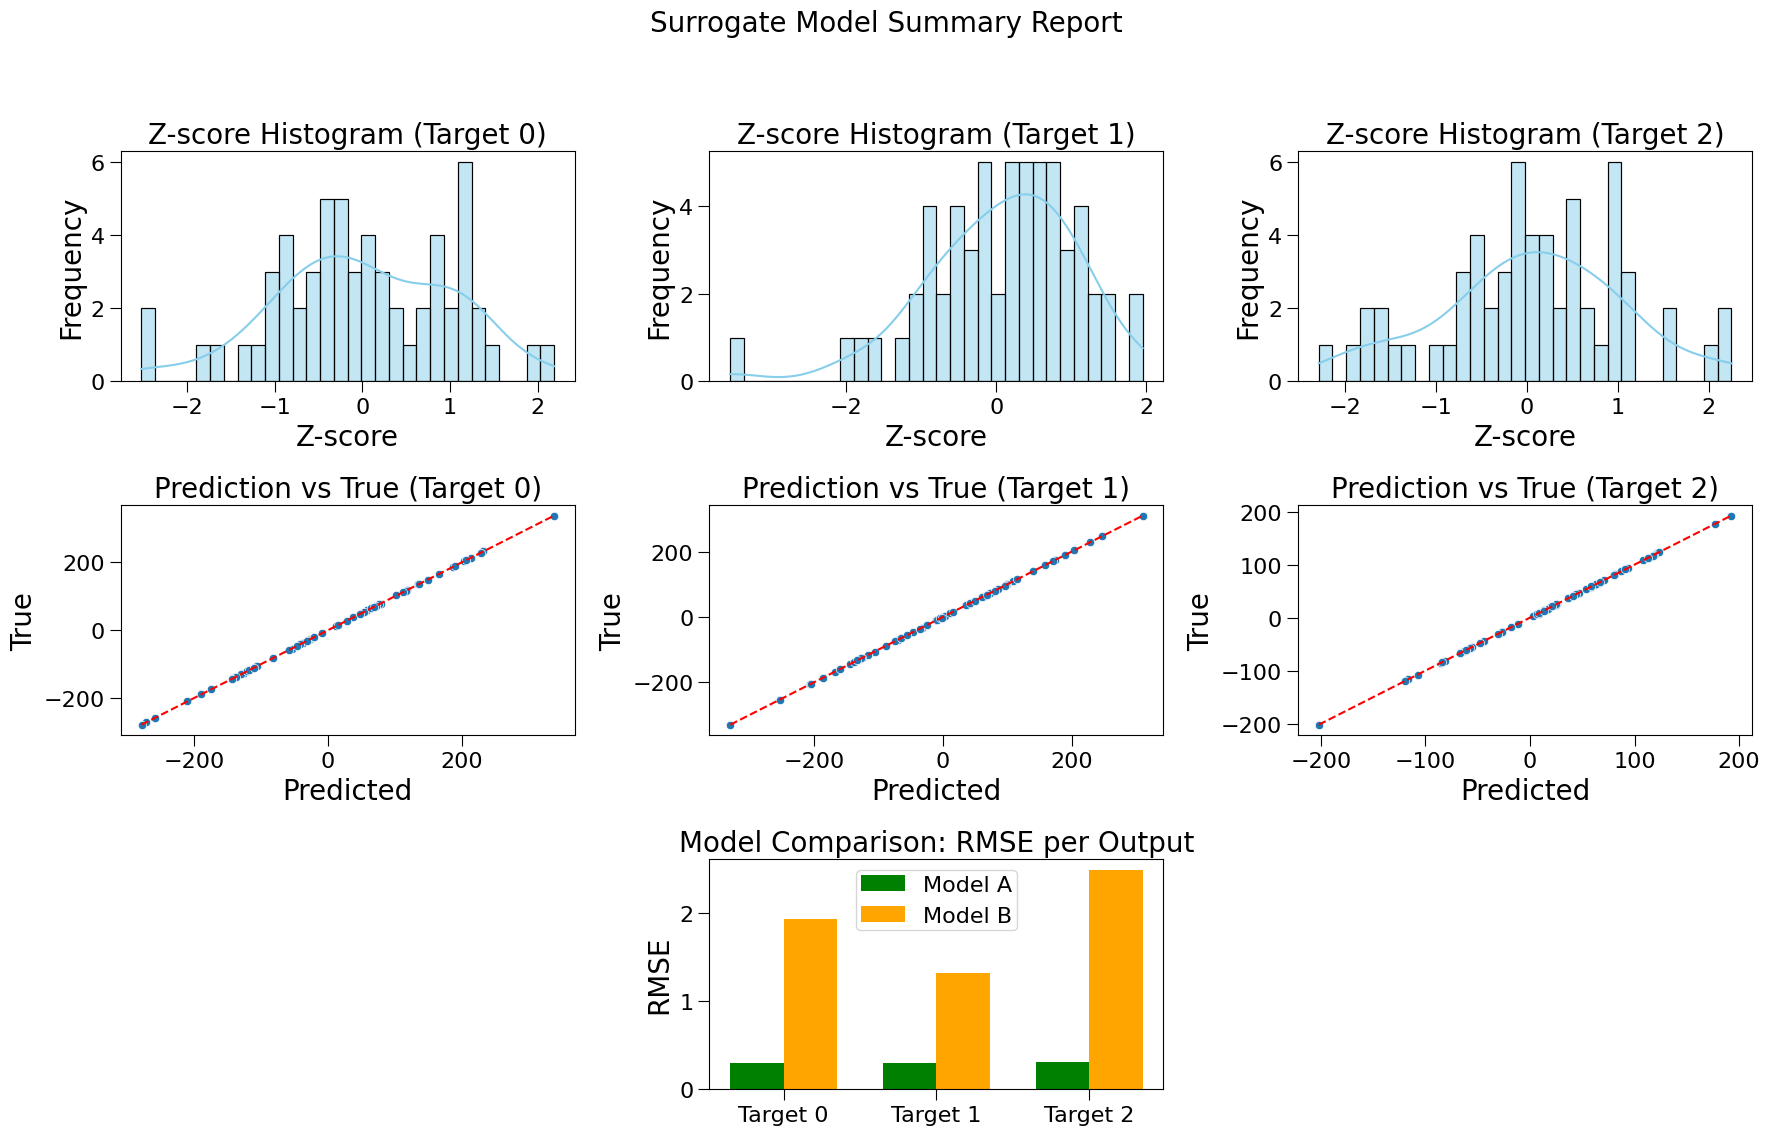

In [3]:
from sklearn.datasets import make_regression
from sklearn.model_selection import train_test_split

X, Y = make_regression(n_samples=300, n_features=5, n_targets=3, noise=0.3, random_state=0)
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=0)

plot_surrogate_model_summary(X_train, X_test, Y_train, Y_test)
